In [1]:
from keras import datasets, models, layers, losses
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import keras_tuner
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random as rd
import numpy as np

In [2]:
plt.rcParams['figure.dpi'] = 140

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [5]:
print(f'Training set shape: {X_train.shape}, test set shape: {X_test.shape}, image shape: {X_train[0].shape}')

Training set shape: (50000, 32, 32, 3), test set shape: (10000, 32, 32, 3), image shape: (32, 32, 3)


In [6]:
print(f'Class labels: {np.unique(y_train)}')

Class labels: [0 1 2 3 4 5 6 7 8 9]


In [7]:
all_labels = np.concatenate((y_train, y_test))
all_labels = all_labels.reshape(60000, )
labels_counter = dict(Counter(all_labels))

In [8]:
print(f'Class labels distribution: {dict(sorted(labels_counter.items()))}')

Class labels distribution: {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


### Dense Neural Network

In [9]:
dnn = models.Sequential()
dnn.add(layers.Flatten(input_shape=(32, 32, 3)))
dnn.add(layers.Dense(units=512, activation='relu'))
dnn.add(layers.Dense(units=256, activation='relu'))
dnn.add(layers.Dense(units=128, activation='relu'))
dnn.add(layers.Dense(units=64, activation='relu'))
dnn.add(layers.Dense(units=10, activation='softmax'))

In [10]:
dnn.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [11]:
dnn_fit = dnn.fit(x=X_train, y=y_train, batch_size=64, epochs=50, validation_split=0.1)

Epoch 1/50



c:\Users\majchrza\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



704/704 [==============================] - 13s 17ms/step - loss: 15.8226 - accuracy: 0.2250 - val_loss: 2.8256 - val_accuracy: 0.2176
Epoch 2/50
704/704 [==============================] - 17s 25ms/step - loss: 2.0379 - accuracy: 0.3146 - val_loss: 1.9563 - val_accuracy: 0.3246
Epoch 3/50
704/704 [==============================] - 13s 18ms/step - loss: 1.8672 - accuracy: 0.3495 - val_loss: 1.8269 - val_accuracy: 0.3458
Epoch 4/50
704/704 [==============================] - 12s 17ms/step - loss: 1.8057 - accuracy: 0.3626 - val_loss: 1.7256 - val_accuracy: 0.3972
Epoch 5/50
704/704 [==============================] - 13s 18ms/step - loss: 1.7854 - accuracy: 0.3679 - val_loss: 1.7582 - val_accuracy: 0.3732
Epoch 6/50
704/704 [==============================] - 12s 18ms/step - loss: 1.7933 - accuracy: 0.3649 - val_loss: 1.7758 - val_accuracy: 0.3668
Epoch 7/50
704/704 [==============================] - 12s 17ms/step - loss: 1.7764 - accuracy: 0.3678 - val_loss: 2.0646 - val_accuracy: 0.3136
E

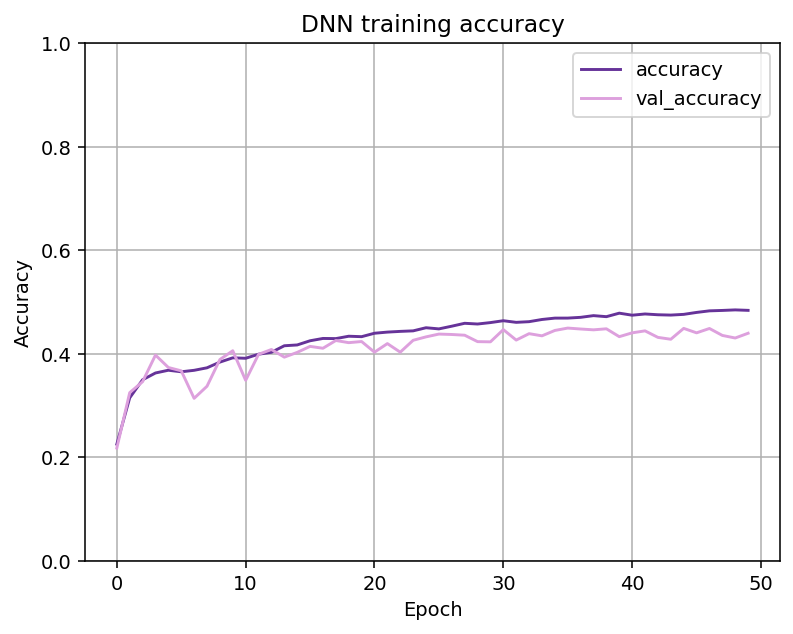

In [21]:
plt.plot(dnn_fit.history['accuracy'], label='accuracy', color='rebeccapurple')
plt.plot(dnn_fit.history['val_accuracy'], label = 'val_accuracy', color='plum')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.title('DNN training accuracy')
plt.legend()
plt.show()

In [13]:
loss_dnn, accuracy_dnn = dnn.evaluate(X_test,  y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5860 - accuracy: 0.4398


In [14]:
predictions_dnn = dnn.predict(X_test)
pred_labels_dnn = np.argmax(predictions_dnn, axis = 1)

313/313 [==============================] - 1s 3ms/step


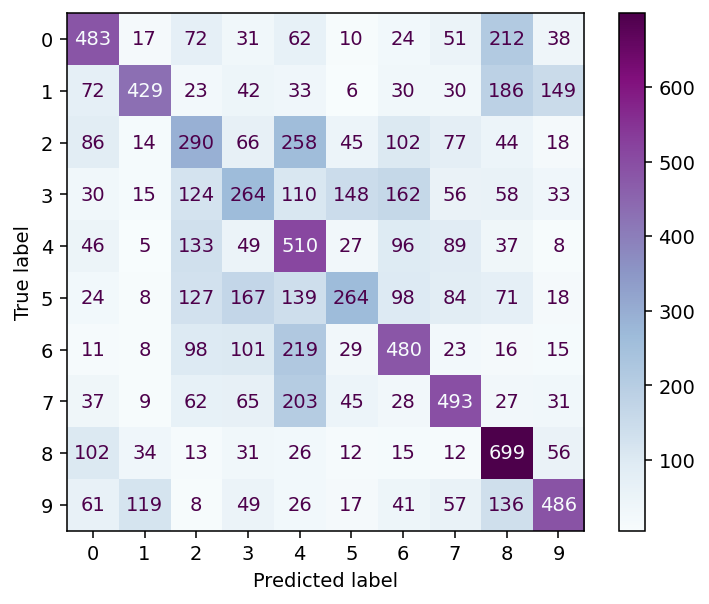

In [15]:
dnn_cm = confusion_matrix(y_test, pred_labels_dnn)
dnn_cmd = ConfusionMatrixDisplay(confusion_matrix=dnn_cm)
dnn_cmd.plot(cmap='BuPu')
plt.show()

### CNN - no image processing

In [4]:
def build_model(hp):

    model = models.Sequential()

    model.add(layers.Conv2D(filters=hp.Int('conv_1_filter', min_value=64, max_value=128, step=32), 
                            kernel_size=hp.Choice('conv_1_kernel', values = [3, 4, 5]), 
                            padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=hp.Int('conv_2_filter', min_value=64, max_value=128, step=32), 
                            kernel_size=hp.Choice('conv_2_kernel', values = [3, 4, 5]), 
                            padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(filters=hp.Int('conv_3_filter', min_value=64, max_value=128, step=32), 
                            kernel_size=hp.Choice('conv_3_kernel', values = [3, 4, 5]), 
                            padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=hp.Int('conv_4_filter', min_value=64, max_value=128, step=32), 
                            kernel_size=hp.Choice('conv_4_kernel', values = [3, 4, 5]), 
                            padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(filters=hp.Int('conv_5_filter', min_value=64, max_value=128, step=32), 
                            kernel_size=hp.Choice('conv_5_kernel', values = [3, 4, 5]), 
                            padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=hp.Int('conv_6_filter', min_value=64, max_value=128, step=32), 
                            kernel_size=hp.Choice('conv_6_kernel', values = [3, 4, 5]), 
                            padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.5))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax')) 

    model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    return model

In [69]:
tuner = keras_tuner.RandomSearch(build_model, objective='val_accuracy', max_trials = 1)
x_tr = X_train[:-5000]
y_tr = y_train[:-5000]
x_val = X_train[-5000:]
y_val = y_train[-5000:]
tuner.search(x_tr, y_tr, epochs=3, validation_data=(x_val, y_val))

Reloading Tuner from .\untitled_project\tuner0.json


In [70]:
cnn = tuner.get_best_models(num_models=1)[0]
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 96)        7296      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 96)        230496    
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 96)        384       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 96)        0         
 D)                                                              
                                                       

In [71]:
cnn_fit = cnn.fit(x=X_train, y=y_train, batch_size=64, epochs=50, validation_split=0.1)

Epoch 1/50


c:\Users\majchrza\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


704/704 [==============================] - 323s 456ms/step - loss: 0.8064 - accuracy: 0.7176 - val_loss: 0.6886 - val_accuracy: 0.7522
Epoch 2/50
704/704 [==============================] - 321s 456ms/step - loss: 0.7444 - accuracy: 0.7405 - val_loss: 0.6882 - val_accuracy: 0.7606
Epoch 3/50
704/704 [==============================] - 316s 449ms/step - loss: 0.6993 - accuracy: 0.7574 - val_loss: 0.6724 - val_accuracy: 0.7738
Epoch 4/50
704/704 [==============================] - 316s 450ms/step - loss: 0.6681 - accuracy: 0.7698 - val_loss: 0.7664 - val_accuracy: 0.7482
Epoch 5/50
704/704 [==============================] - 316s 449ms/step - loss: 0.6191 - accuracy: 0.7880 - val_loss: 0.6135 - val_accuracy: 0.7918
Epoch 6/50
704/704 [==============================] - 315s 448ms/step - loss: 0.5884 - accuracy: 0.7983 - val_loss: 0.5895 - val_accuracy: 0.8032
Epoch 7/50
704/704 [==============================] - 317s 451ms/step - loss: 0.5600 - accuracy: 0.8080 - val_loss: 0.5383 - val_accura

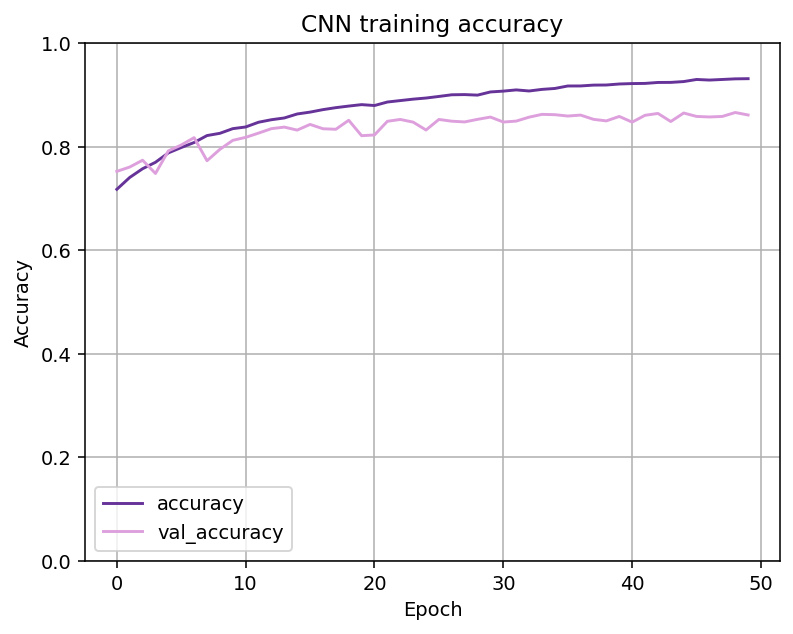

In [72]:
plt.plot(cnn_fit.history['accuracy'], label='accuracy', color='rebeccapurple')
plt.plot(cnn_fit.history['val_accuracy'], label = 'val_accuracy', color='plum')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.title('CNN training accuracy')
plt.legend()
plt.show()

In [73]:
loss_cnn, accuracy_cnn = cnn.evaluate(X_test,  y_test)

313/313 [==============================] - 23s 73ms/step - loss: 0.5346 - accuracy: 0.8576


In [74]:
predictions_cnn = cnn.predict(X_test)
pred_labels_cnn = np.argmax(predictions_cnn, axis = 1)

313/313 [==============================] - 23s 71ms/step


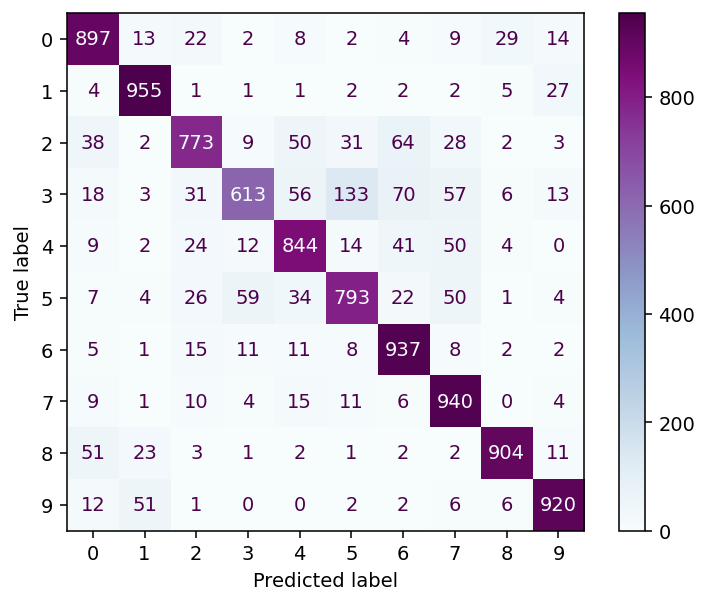

In [75]:
cnn_cm = confusion_matrix(y_test, pred_labels_cnn)
cnn_cmd = ConfusionMatrixDisplay(confusion_matrix=cnn_cm)
cnn_cmd.plot(cmap='BuPu')
plt.show()

### CNN - image processing

In [5]:
X_train_new = X_train
y_train_new = y_train

Flipping left-right

In [6]:
example = X_train[0]

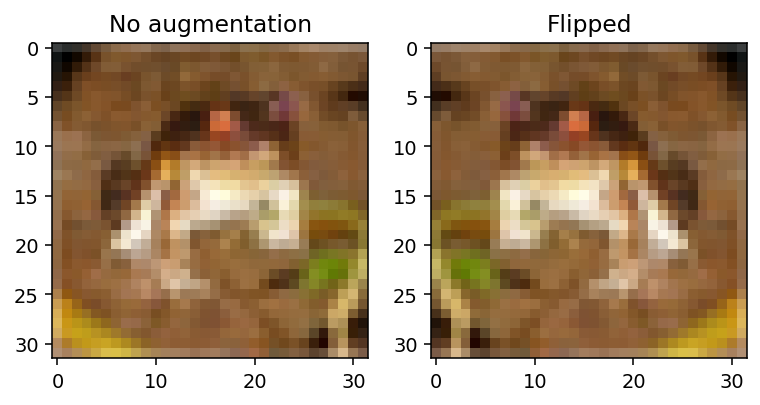

In [7]:
ex_flip = tf.image.flip_left_right(example)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(example)
ax[0].set_title('No augmentation')
ax[1].imshow(ex_flip)
ax[1].set_title('Flipped')
plt.show()

In [8]:
inds_flip = rd.sample(range(len(X_train)), 5000)

for i in inds_flip:
    img = X_train[i]
    label = y_train[i].reshape(1, 1)
    img_flipped = np.array(tf.image.flip_left_right(img)).reshape(1, 32, 32, 3)
    X_train_new = np.concatenate((X_train_new, img_flipped))
    y_train_new = np.concatenate((y_train_new, label))

Saturation

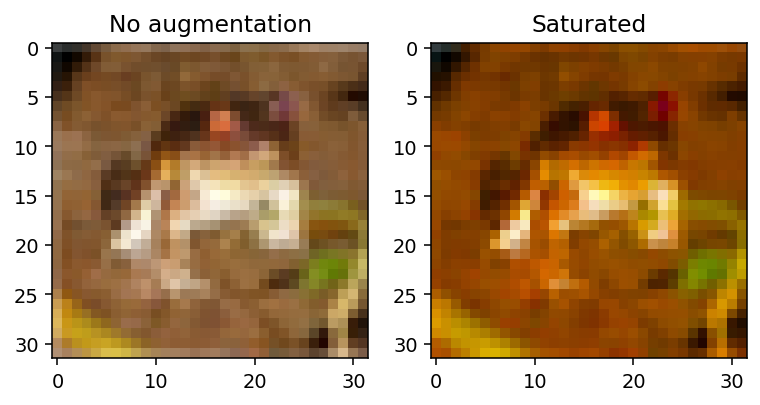

In [9]:
ex_sat = tf.image.adjust_saturation(example, 3)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(example)
ax[0].set_title('No augmentation')
ax[1].imshow(ex_sat)
ax[1].set_title('Saturated')
plt.show()

In [10]:
inds_sat = rd.sample(range(len(X_train)), 5000)

for i in inds_sat:
    img = X_train[i]
    label = y_train[i].reshape(1, 1)
    img_saturated = np.array(tf.image.adjust_saturation(img, 3)).reshape(1, 32, 32, 3)
    X_train_new = np.concatenate((X_train_new, img_saturated))
    y_train_new = np.concatenate((y_train_new, label))

Change brightness

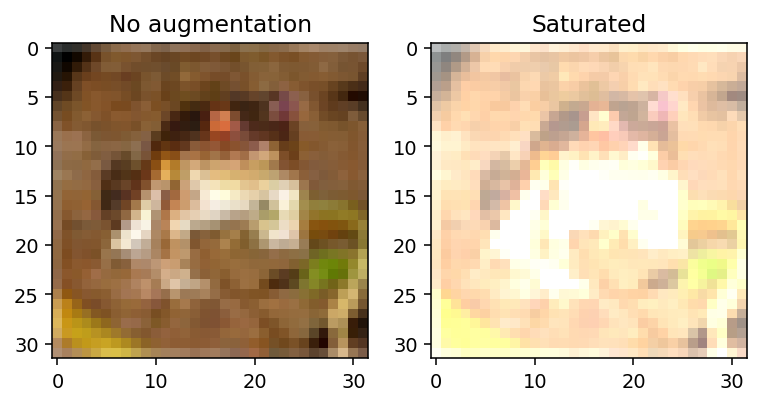

In [11]:
ex_bright = tf.image.adjust_brightness(example, 0.5)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(example)
ax[0].set_title('No augmentation')
ax[1].imshow(ex_bright)
ax[1].set_title('Saturated')
plt.show()

In [12]:
inds_bright = rd.sample(range(len(X_train)), 5000)

for i in inds_bright:
    img = X_train[i]
    label = y_train[i].reshape(1, 1)
    img_bright = np.array(tf.image.adjust_brightness(img, 0.5)).reshape(1, 32, 32, 3)
    X_train_new = np.concatenate((X_train_new, img_bright))
    y_train_new = np.concatenate((y_train_new, label))

Rotate

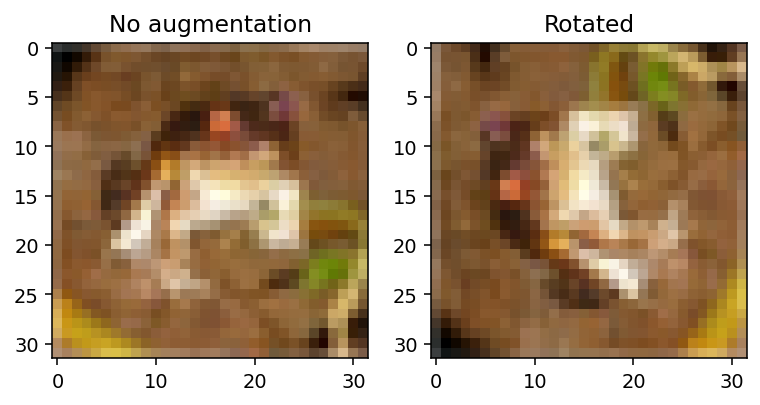

In [13]:
ex_rot = tf.image.rot90(example)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(example)
ax[0].set_title('No augmentation')
ax[1].imshow(ex_rot)
ax[1].set_title('Rotated')
plt.show()

In [14]:
inds_rot = rd.sample(range(len(X_train)), 5000)

for i in inds_rot:
    img = X_train[i]
    label = y_train[i].reshape(1, 1)
    img_rot = np.array(tf.image.rot90(img)).reshape(1, 32, 32, 3)
    X_train_new = np.concatenate((X_train_new, img_rot))
    y_train_new = np.concatenate((y_train_new, label))

In [15]:
indices = np.random.permutation(len(X_train_new))
X_train_new = X_train_new[indices]
y_train_new = y_train_new[indices]

Training the model

In [16]:
tuner2 = keras_tuner.RandomSearch(build_model, objective='val_accuracy', max_trials = 1)
x_tr2 = X_train_new[:-7000]
y_tr2 = y_train_new[:-7000]
x_val2 = X_train_new[-7000:]
y_val2 = y_train_new[-7000:]
tuner2.search(x_tr2, y_tr2, epochs=3, validation_data=(x_val2, y_val2))

Trial 1 Complete [00h 20m 26s]
val_accuracy: 0.7304285764694214

Best val_accuracy So Far: 0.7304285764694214
Total elapsed time: 00h 20m 26s


In [17]:
cnn2 = tuner2.get_best_models(num_models=1)[0]
cnn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

In [18]:
cnn_fit2 = cnn2.fit(x=X_train_new, y=y_train_new, batch_size=64, epochs=50, validation_split=0.1)

Epoch 1/50
985/985 [==============================] - 382s 385ms/step - loss: 0.7211 - accuracy: 0.7530 - val_loss: 0.6166 - val_accuracy: 0.7847
Epoch 2/50
985/985 [==============================] - 379s 384ms/step - loss: 0.6517 - accuracy: 0.7778 - val_loss: 0.7099 - val_accuracy: 0.7659
Epoch 3/50
985/985 [==============================] - 380s 386ms/step - loss: 0.6022 - accuracy: 0.7943 - val_loss: 0.5717 - val_accuracy: 0.8061
Epoch 4/50
985/985 [==============================] - 379s 385ms/step - loss: 0.5553 - accuracy: 0.8112 - val_loss: 0.7140 - val_accuracy: 0.7666
Epoch 5/50
985/985 [==============================] - 382s 388ms/step - loss: 0.5222 - accuracy: 0.8222 - val_loss: 0.5664 - val_accuracy: 0.8039
Epoch 6/50
985/985 [==============================] - 381s 387ms/step - loss: 0.4882 - accuracy: 0.8317 - val_loss: 0.5088 - val_accuracy: 0.8243
Epoch 7/50
985/985 [==============================] - 385s 390ms/step - loss: 0.4602 - accuracy: 0.8441 - val_loss: 0.4998 -

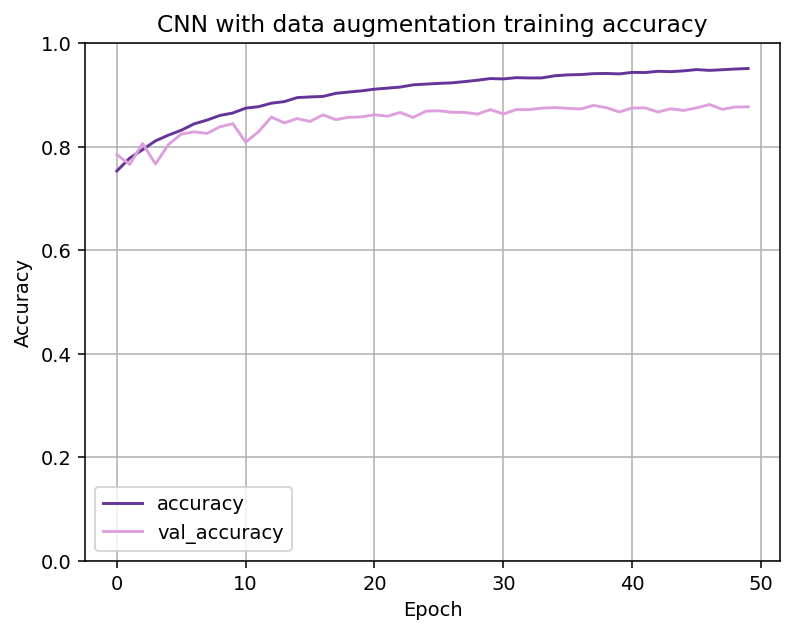

In [19]:
plt.plot(cnn_fit2.history['accuracy'], label='accuracy', color='rebeccapurple')
plt.plot(cnn_fit2.history['val_accuracy'], label = 'val_accuracy', color='plum')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.title('CNN with data augmentation training accuracy')
plt.legend()
plt.show()

In [20]:
loss_cnn2, accuracy_cnn2 = cnn2.evaluate(X_test, y_test)

313/313 [==============================] - 20s 63ms/step - loss: 0.4998 - accuracy: 0.8684


In [21]:
predictions_cnn2 = cnn2.predict(X_test)
pred_labels_cnn2 = np.argmax(predictions_cnn2, axis = 1)

313/313 [==============================] - 20s 63ms/step


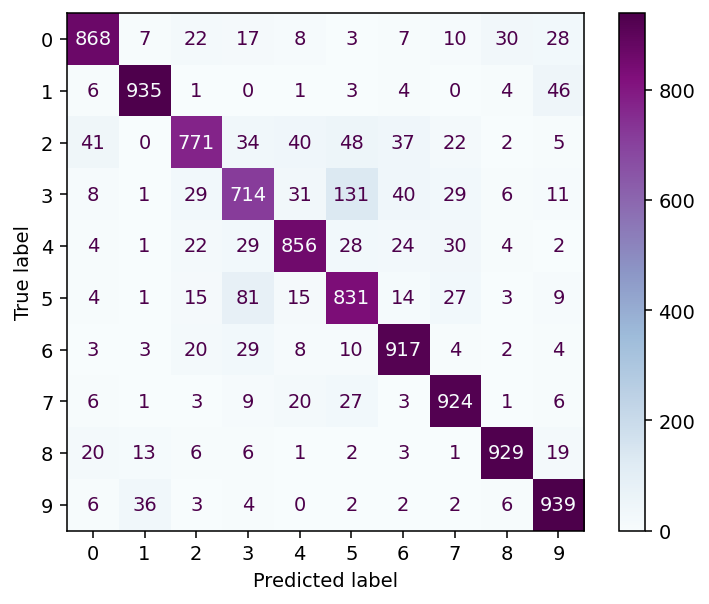

In [22]:
cnn_cm2 = confusion_matrix(y_test, pred_labels_cnn2)
cnn_cmd2 = ConfusionMatrixDisplay(confusion_matrix=cnn_cm2)
cnn_cmd2.plot(cmap='BuPu')
plt.show()